In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [2]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以新北市第二選區立委林淑芬為例，依照月份來統計數值資料的變化

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [6]:
lin = fb[fb.page_name == "林淑芬"]
# 把時間格式轉換
lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
lin['post_hour'] = pd.to_datetime(lin['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
lin['month_year'] = pd.to_datetime(lin['new_date']).dt.to_period('M')
lin.head(1)

<ipython-input-6-c9a31267c34a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
<ipython-input-6-c9a31267c34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['post_hour'] = pd.to_datetime(lin['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-6-c9a31267c34a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
21821,169014523134260_2030287527006941,169014523134260,林淑芬,政治人物,NaN,NaN,link,https://www.facebook.com/169014523134260/posts...,2019-01-15T11:26:05+0000,2019-01-15T19:26:05,...,0,0,0,0,0,5,1,2019-01-15,19,2019-01


In [7]:
#發文時間分佈
post_time = lin[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,6
1,1,1
2,7,5
3,8,21
4,9,23
5,10,14
6,11,11
7,12,19
8,13,16
9,14,12


In [8]:
lin[lin.created_time_taipei == max(lin.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
22050,169014523134260_2675697385799282,169014523134260,林淑芬,政治人物,｜感謝有您！｜\n\n今天有個民眾拍拍我的手，\n對我說，\n「加油，請你繼續為我們服務，謝...,NaN,photo,https://www.facebook.com/169014523134260/posts...,2020-01-10T11:46:45+0000,2020-01-10T19:46:45,...,0,0,0,0,0,117,16,2020-01-10,19,2020-01


In [9]:
lin[lin.created_time_taipei == min(lin.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
21840,169014523134260_2008891369146557,169014523134260,林淑芬,政治人物,2019\n進者 往生極樂；\n退者 無間地獄！！\n前進、前進、再前進。,NaN,photo,https://www.facebook.com/169014523134260/posts...,2018-12-31T16:26:41+0000,2019-01-01T00:26:41,...,0,0,0,0,0,37,2,2019-01-01,0,2019-01


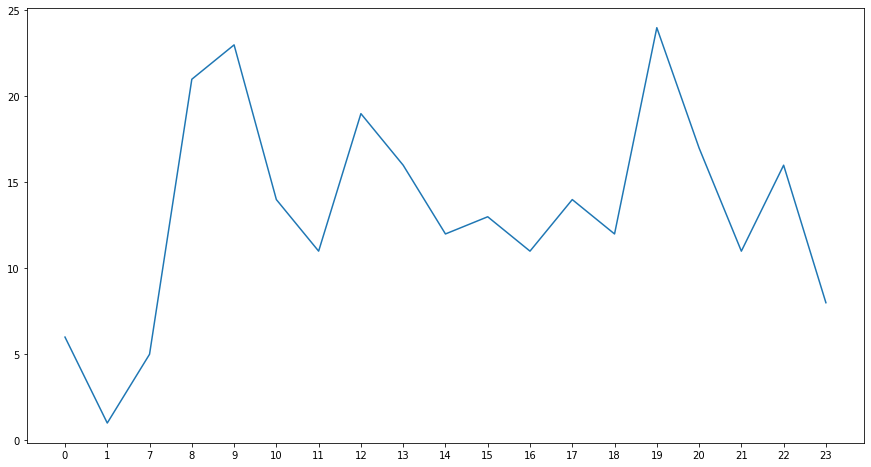

In [10]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [11]:
#整年貼文數量分佈
whole_year = lin[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,37
1,2019-02,22
2,2019-03,25
3,2019-04,24
4,2019-05,9
5,2019-06,14
6,2019-07,8
7,2019-08,7
8,2019-09,10
9,2019-10,17


In [12]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,19.538462
std,9.709234
min,7.000000
25%,10.000000
50%,20.000000
75%,25.000000
max,37.000000


In [13]:
results = lin.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,6253537355967620,46484,0,0,0,0,0,1860,3078,512
2019-02,3718319508953720,27645,0,0,0,0,0,1018,2284,327
2019-03,4225363078356500,49684,0,0,0,0,0,2329,2238,402
2019-04,4056348555222240,44767,0,0,0,0,0,3158,1636,386
2019-05,1521130708208340,13872,0,0,0,0,0,1414,351,150
2019-06,2366203323879640,19358,0,0,0,0,0,573,1040,196
2019-07,1352116185074080,11006,0,0,0,0,0,360,1375,116
2019-08,1183101661939820,6228,0,0,0,0,0,346,326,91
2019-09,1690145231342600,11026,0,0,0,0,0,490,1186,145


In [14]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,6253537355967620,46484,0,0,0,0,0,1860,3078,512
1,2019-02,3718319508953720,27645,0,0,0,0,0,1018,2284,327
2,2019-03,4225363078356500,49684,0,0,0,0,0,2329,2238,402
3,2019-04,4056348555222240,44767,0,0,0,0,0,3158,1636,386
4,2019-05,1521130708208340,13872,0,0,0,0,0,1414,351,150
5,2019-06,2366203323879640,19358,0,0,0,0,0,573,1040,196
6,2019-07,1352116185074080,11006,0,0,0,0,0,360,1375,116
7,2019-08,1183101661939820,6228,0,0,0,0,0,346,326,91
8,2019-09,1690145231342600,11026,0,0,0,0,0,490,1186,145
9,2019-10,2873246893282420,15011,0,0,0,0,0,702,1542,280


In [15]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

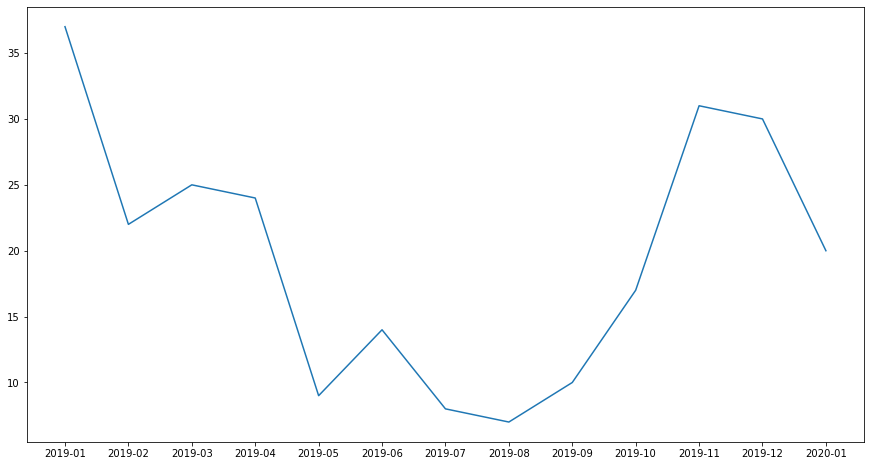

In [16]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [17]:
# 每個月的按讚、評論、分享總數 分佈
results = lin.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,6253537355967620,46484,0,0,0,0,0,1860,3078,512
1,2019-02,3718319508953720,27645,0,0,0,0,0,1018,2284,327
2,2019-03,4225363078356500,49684,0,0,0,0,0,2329,2238,402
3,2019-04,4056348555222240,44767,0,0,0,0,0,3158,1636,386
4,2019-05,1521130708208340,13872,0,0,0,0,0,1414,351,150
5,2019-06,2366203323879640,19358,0,0,0,0,0,573,1040,196
6,2019-07,1352116185074080,11006,0,0,0,0,0,360,1375,116
7,2019-08,1183101661939820,6228,0,0,0,0,0,346,326,91
8,2019-09,1690145231342600,11026,0,0,0,0,0,490,1186,145
9,2019-10,2873246893282420,15011,0,0,0,0,0,702,1542,280


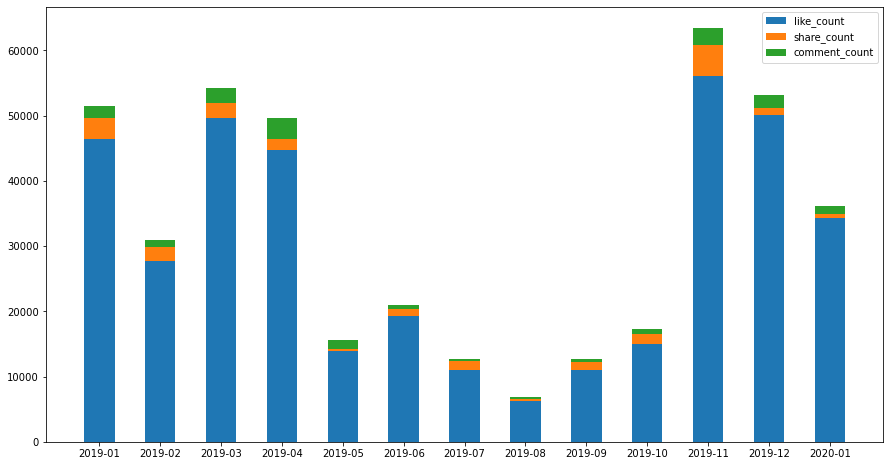

In [18]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [19]:
# 1、3、4、11、12月按讚、分享、評論數特別高，因此找出該月份的資料
high = lin[lin.month_year == "2019-01"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01-01,169014523134260,846,0,0,0,0,0,37,2,0
1,2019-01-02,169014523134260,9187,0,0,0,0,0,281,256,21
2,2019-01-03,338029046268520,2500,0,0,0,0,0,123,39,30
3,2019-01-04,338029046268520,2132,0,0,0,0,0,87,98,24
4,2019-01-05,169014523134260,2429,0,0,0,0,0,204,213,10
5,2019-01-06,338029046268520,2242,0,0,0,0,0,71,273,31
6,2019-01-07,507043569402780,2625,0,0,0,0,0,242,345,51
7,2019-01-11,338029046268520,1944,0,0,0,0,0,24,233,34
8,2019-01-12,338029046268520,4149,0,0,0,0,0,74,468,35
9,2019-01-13,169014523134260,756,0,0,0,0,0,21,39,18


No handles with labels found to put in legend.


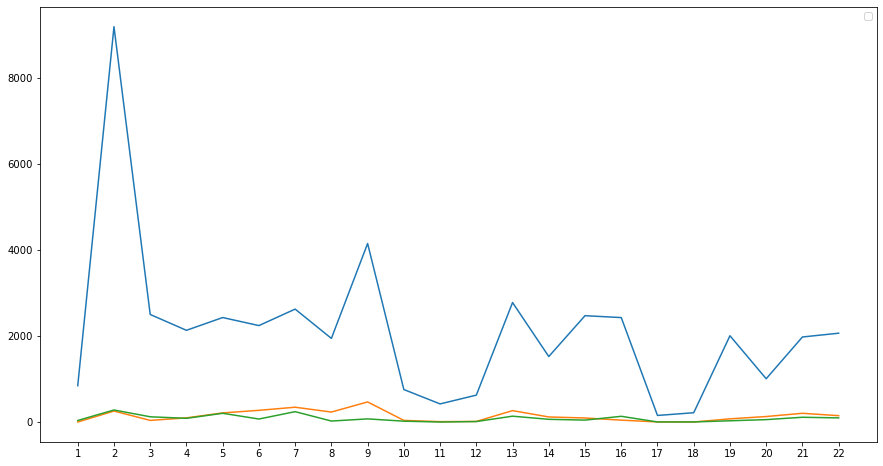

In [20]:
#畫圖 看整個一月按讚、分享、評論的流量
labels = [str(i) for i in range(1,23)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [21]:
# 1/2 號很明顯按讚衝高  因此找出這天的文章
lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str
Jan_02 = lin[lin['new_date'] == "2019-01-02"]
Jan_02[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-21-16bb743afc7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
21839,#去你的一國兩制。,281,9187


只有圖，回應中國九二共識談話

In [22]:
# 1、3、4、11、12月按讚、分享、評論數特別高，因此找出該月份的資料
highh = lin[lin.month_year == "2019-03"]
results_highh = highh.groupby('new_date').sum()
results_highh.index.name = 'newhead' #更改欄位名稱
results_highh.reset_index(inplace=True)
results_highh

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-03-01,169014523134260,1361,0,0,0,0,0,43,226,13
1,2019-03-04,169014523134260,1491,0,0,0,0,0,76,32,18
2,2019-03-07,338029046268520,2544,0,0,0,0,0,148,131,39
3,2019-03-08,169014523134260,714,0,0,0,0,0,21,3,13
4,2019-03-11,507043569402780,1855,0,0,0,0,0,67,53,48
5,2019-03-12,169014523134260,454,0,0,0,0,0,114,2,16
6,2019-03-13,169014523134260,3270,0,0,0,0,0,141,306,13
7,2019-03-15,169014523134260,2116,0,0,0,0,0,68,16,22
8,2019-03-16,338029046268520,5413,0,0,0,0,0,231,157,30
9,2019-03-17,169014523134260,8245,0,0,0,0,0,472,204,8


No handles with labels found to put in legend.


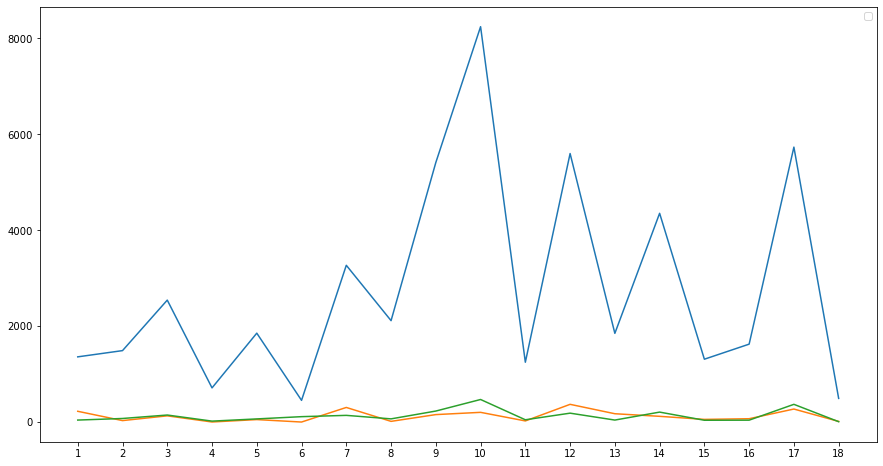

In [23]:
#畫圖 看整個三月按讚、分享、評論的流量
labels = [str(i) for i in range(1,19)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highh['like_count'])
ax.plot(labels, results_highh['share_count'])
ax.plot(labels, results_highh['comment_count'])

ax.legend()

plt.show()

In [25]:
# 3/17 號很明顯按讚衝高  因此找出這天的文章
lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str
Mar_17 = lin[lin['new_date'] == "2019-03-17"]
Mar_17[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-25-4d35d2c49e77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
21904,【淑芬將為三重、蘆洲、五股地區鄉親，參選「區域立委」到底！】 過去一段時間， 忙著協助余天...,472,8245


選舉動員、向黨中央喊話，拒當不分區

In [26]:
# 1、3、4、11、12月按讚、分享、評論數特別高，因此找出該月份的資料
highhh = lin[lin.month_year == "2019-04"]
results_highhh = highhh.groupby('new_date').sum()
results_highhh.index.name = 'newhead' #更改欄位名稱
results_highhh.reset_index(inplace=True)
results_highhh

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-04-01,169014523134260,826,0,0,0,0,0,40,52,9
1,2019-04-03,169014523134260,665,0,0,0,0,0,30,12,20
2,2019-04-06,169014523134260,1820,0,0,0,0,0,112,40,11
3,2019-04-15,169014523134260,541,0,0,0,0,0,18,6,21
4,2019-04-16,169014523134260,3943,0,0,0,0,0,241,226,8
5,2019-04-17,338029046268520,2908,0,0,0,0,0,317,76,31
6,2019-04-18,507043569402780,6242,0,0,0,0,0,681,433,50
7,2019-04-19,169014523134260,1570,0,0,0,0,0,66,30,21
8,2019-04-20,507043569402780,3567,0,0,0,0,0,644,107,54
9,2019-04-21,338029046268520,3094,0,0,0,0,0,78,53,32


No handles with labels found to put in legend.


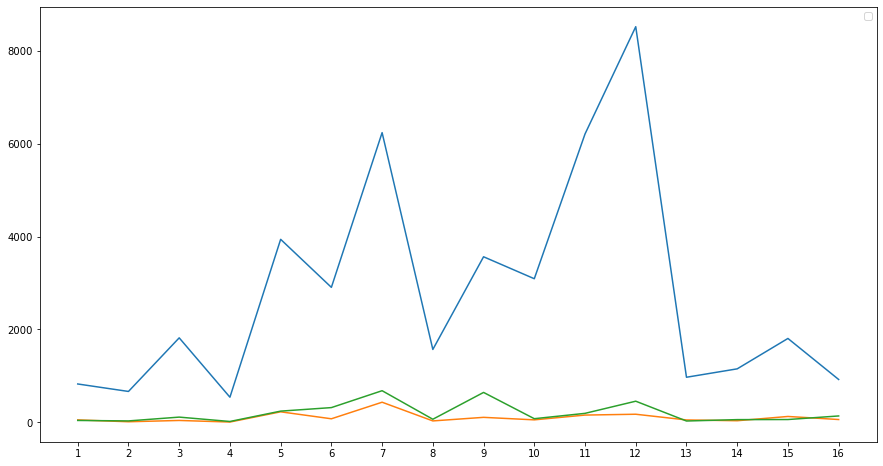

In [27]:
#畫圖 看整個四月按讚、分享、評論的流量
labels = [str(i) for i in range(1,17)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highhh['like_count'])
ax.plot(labels, results_highhh['share_count'])
ax.plot(labels, results_highhh['comment_count'])

ax.legend()

plt.show()

In [28]:
# 4/23 號很明顯按讚衝高  因此找出這天的文章
lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str
Apr_23 = lin[lin['new_date'] == "2019-04-23"]
Apr_23[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-28-850803e60afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
21913,不只是旺旺中國,83,1416
21914,感謝各位好朋友的支持， 淑芬確定參與2020年立委選舉。 明年大選在財團當道，以及中國的威脅...,372,7109


選舉動員、訴諸於中國、財團

In [29]:
# 1、3、4、11、12月按讚、分享、評論數特別高，因此找出該月份的資料
higher = lin[lin.month_year == "2019-11"]
results_higher = higher.groupby('new_date').sum()
results_higher.index.name = 'newhead' #更改欄位名稱
results_higher.reset_index(inplace=True)
results_higher

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-11-04,338029046268520,2083,0,0,0,0,0,65,92,30
1,2019-11-05,169014523134260,542,0,0,0,0,0,16,5,19
2,2019-11-08,169014523134260,1033,0,0,0,0,0,48,97,11
3,2019-11-09,169014523134260,1536,0,0,0,0,0,27,148,13
4,2019-11-10,169014523134260,989,0,0,0,0,0,56,108,10
5,2019-11-14,676058092537040,9376,0,0,0,0,0,475,409,66
6,2019-11-15,338029046268520,1419,0,0,0,0,0,72,83,26
7,2019-11-16,507043569402780,2463,0,0,0,0,0,102,487,32
8,2019-11-17,169014523134260,6568,0,0,0,0,0,492,429,1
9,2019-11-18,169014523134260,7160,0,0,0,0,0,368,1376,12


No handles with labels found to put in legend.


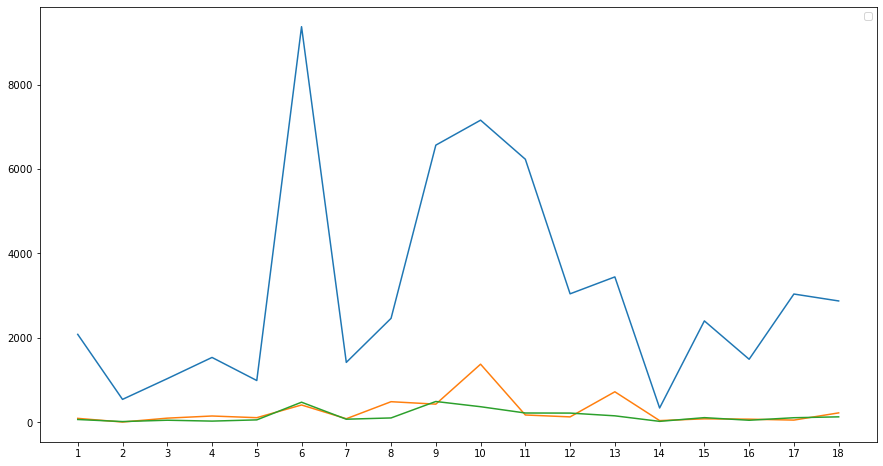

In [30]:
#畫圖 看整個11月按讚、分享、評論的流量
labels = [str(i) for i in range(1,19)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_higher['like_count'])
ax.plot(labels, results_higher['share_count'])
ax.plot(labels, results_higher['comment_count'])

ax.legend()

plt.show()

In [31]:
# 11/14 號很明顯按讚衝高  因此找出這天的文章
lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str
Nov_14 = lin[lin['new_date'] == "2019-11-14"]
Nov_14[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-31-498525c6959b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin['new_date']=lin['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
22017,夜深腦子 突然浮現幾個字 「克勞塞維玆」魔咒。,28,511
22018,【淑芬想拜託大家分享訊息 給香港多一份力量！】 香港反送中條例抗爭自今年6月大規模示威遊行...,33,2022
22019,#有辦法求證? https://blog.boxun.com/hero/201405/ha...,47,395
22020,有KMT這些不分區立委的立法院， 我們還需要敵人嘛？,367,6448


11/14 數值不至於到最多，最多約6500，與KMT、中國有關

In [32]:
# 1、3、4、11、12月按讚、分享、評論數特別高，因此找出該月份的資料
highest = lin[lin.month_year == "2019-12"]
results_highest = highest.groupby('new_date').sum()
results_highest.index.name = 'newhead' #更改欄位名稱
results_highest.reset_index(inplace=True)
results_highest

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-12-02,169014523134260,4543,0,0,0,0,0,250,126,8
1,2019-12-03,169014523134260,2599,0,0,0,0,0,90,63,9
2,2019-12-04,169014523134260,2621,0,0,0,0,0,51,37,8
3,2019-12-05,169014523134260,1708,0,0,0,0,0,48,54,8
4,2019-12-06,169014523134260,3764,0,0,0,0,0,142,101,8
5,2019-12-07,169014523134260,3183,0,0,0,0,0,138,58,18
6,2019-12-09,169014523134260,2414,0,0,0,0,0,110,58,17
7,2019-12-10,169014523134260,1711,0,0,0,0,0,75,29,12
8,2019-12-11,169014523134260,696,0,0,0,0,0,20,132,17
9,2019-12-12,169014523134260,2756,0,0,0,0,0,84,96,8


No handles with labels found to put in legend.


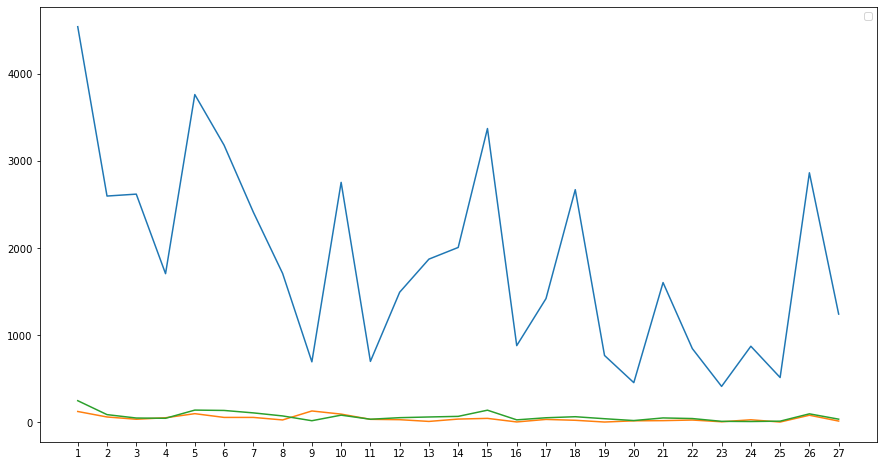

In [33]:
#畫圖 看整個12月按讚、分享、評論的流量
labels = [str(i) for i in range(1,28)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_highest['like_count'])
ax.plot(labels, results_highest['share_count'])
ax.plot(labels, results_highest['comment_count'])

ax.legend()

plt.show()

12月按讚數不多，但貼文數量變多，推測可能是選前號召？

In [34]:
#找出評論數量的統計值
lin['comment_count'].describe()

count    254.000000
mean      71.468504
std       88.342740
min        1.000000
25%       21.000000
50%       41.000000
75%       89.500000
max      571.000000
Name: comment_count, dtype: float64

In [35]:
#找出按讚數量的統計值
lin['like_count'].describe()


count     254.000000
mean     1517.649606
std      1421.729782
min        81.000000
25%       606.000000
50%      1074.500000
75%      1812.750000
max      9187.000000
Name: like_count, dtype: float64

In [39]:
#按讚次數最多的貼文 
mostlike_10 = lin.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
21839,#去你的一國兩制。,9187,2019-01
21904,【淑芬將為三重、蘆洲、五股地區鄉親，參選「區域立委」到底！】 過去一段時間， 忙著協助余天...,8245,2019-03
22010,【不要再以無共識之名，丟下礦業法！】 從2017年7月礦業法在臨時會開啟首次審查後， 到2...,7160,2019-11
21914,感謝各位好朋友的支持， 淑芬確定參與2020年立委選舉。 明年大選在財團當道，以及中國的威脅...,7109,2019-04
22011,#就憑這篇胡說八道的報導指控我們 https://news.ltn.com.tw/news/...,6568,2019-11
22020,有KMT這些不分區立委的立法院， 我們還需要敵人嘛？,6448,2019-11
21876,謝謝投給陳永和的11萬人。 #人民擁有力量,6115,2019-02
21895,【淑芬已完成初選登記，＃電話民調請唯一支持林淑芬！】 當國家政策把追求經濟發展、產業利益放...,5034,2019-03
21880,#沒見過這樣的公司領導者 過去華航空服員罷工提出七項訴求， 剛上任的何煖軒董事長親自上場...,4817,2019-02
21937,【尊重公投結果與憲法法制，落實民主， 跨黨派通過〈司法院釋字第748號解釋施行法草案〉！】 ...,4791,2019-05


In [40]:
#最多讚數前10的文章的 種類 video / photo?
mostlike_10 = lin.sort_values(by = ['like_count'],ascending= False ).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
link,2,2,2,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
photo,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
status,4,4,4,4,4,0,4,4,4,0,...,4,4,4,4,4,4,4,4,4,4


In [41]:
# 比較、查看他政見
promise = politics[politics.姓名 == "林 淑 芬"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['10    在雞蛋與高牆之間，林淑芬選擇跟雞蛋同一邊', '站在人民這一邊的立委林淑芬', ' (1)為人民捍衛食...']

1. 訴諸中國
2. 不畏懼財團，呼應4/23貼文
3. 礦業法、國土計畫法、勞基法等政見呼應高讚數貼文